In [1]:
%matplotlib notebook

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display, Image, HTML
from __future__ import division, print_function
import numpy as np
import math
import glob
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import plot2
import ephem
from matplotlib.ticker import Formatter, FixedFormatter, FixedLocator
from matplotlib import text
import time

#start_time = time.time()

In [2]:
# import data files (sessions A-F for GBT timing observations and dunc's list of all msp's are below)

psr_positions_a = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/GBT/a_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_b = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/GBT/b_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_c = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/GBT/c_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_d = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/GBT/d_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_e = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/GBT/e_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_fa = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/GBT/f_a_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_fb = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/GBT/f_b_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_msps = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/GBT/duncs_list_all_msps_excludeGBTsessions_1-2018.txt', usecols=(0,1))
gcenter = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/GBT/galactic_center.txt', usecols=(0,1))

a = SkyCoord(ra=psr_positions_a[:,0]*u.degree, dec=psr_positions_a[:,1]*u.degree, frame='icrs')
b = SkyCoord(ra=psr_positions_b[:,0]*u.degree, dec=psr_positions_b[:,1]*u.degree, frame='icrs')
c = SkyCoord(ra=psr_positions_c[:,0]*u.degree, dec=psr_positions_c[:,1]*u.degree, frame='icrs')
d = SkyCoord(ra=psr_positions_d[:,0]*u.degree, dec=psr_positions_d[:,1]*u.degree, frame='icrs')
e = SkyCoord(ra=psr_positions_e[:,0]*u.degree, dec=psr_positions_e[:,1]*u.degree, frame='icrs')
fa = SkyCoord(ra=psr_positions_fa[0]*u.degree, dec=psr_positions_fa[1]*u.degree, frame='icrs')
fb = SkyCoord(ra=psr_positions_fb[0]*u.degree, dec=psr_positions_fb[1]*u.degree, frame='icrs')
msps = SkyCoord(ra=psr_positions_msps[:,0]*u.degree, dec=psr_positions_msps[:,1]*u.degree, frame='icrs')
gc = SkyCoord(ra=gcenter[0]*u.degree, dec=gcenter[1]*u.degree, frame='icrs')

#print(a.ra.radian, a.dec.radian)
#print(b.ra.radian, b.dec.radian)
#print(c.ra.radian, c.dec.radian)
#print(d.ra.radian, d.dec.radian)
#print(e.ra.radian, e.dec.radian)
#print(fa.ra.radian, fa.dec.radian)
#print(fb.ra.radian, fb.dec.radian)
#print(msps.ra.radian, msps.dec.radian)
print(gc.ra.radian, gc.dec.radian)


4.6498485973 -0.50628161876


In [3]:
def plot_mwd(RA,Dec,org=0):
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    '''
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    
    x = SkyCoord(ra=RA*u.degree, dec=Dec*u.degree, frame='icrs')# reverse the scale: East to the left 
    
    gplane = ax.plot(x.ra.radian, x.dec.radian, 
                color ='k', linestyle='--', linewidth=2.25, label="Galactic plane", zorder=0)  


<IPython.core.display.Javascript object>


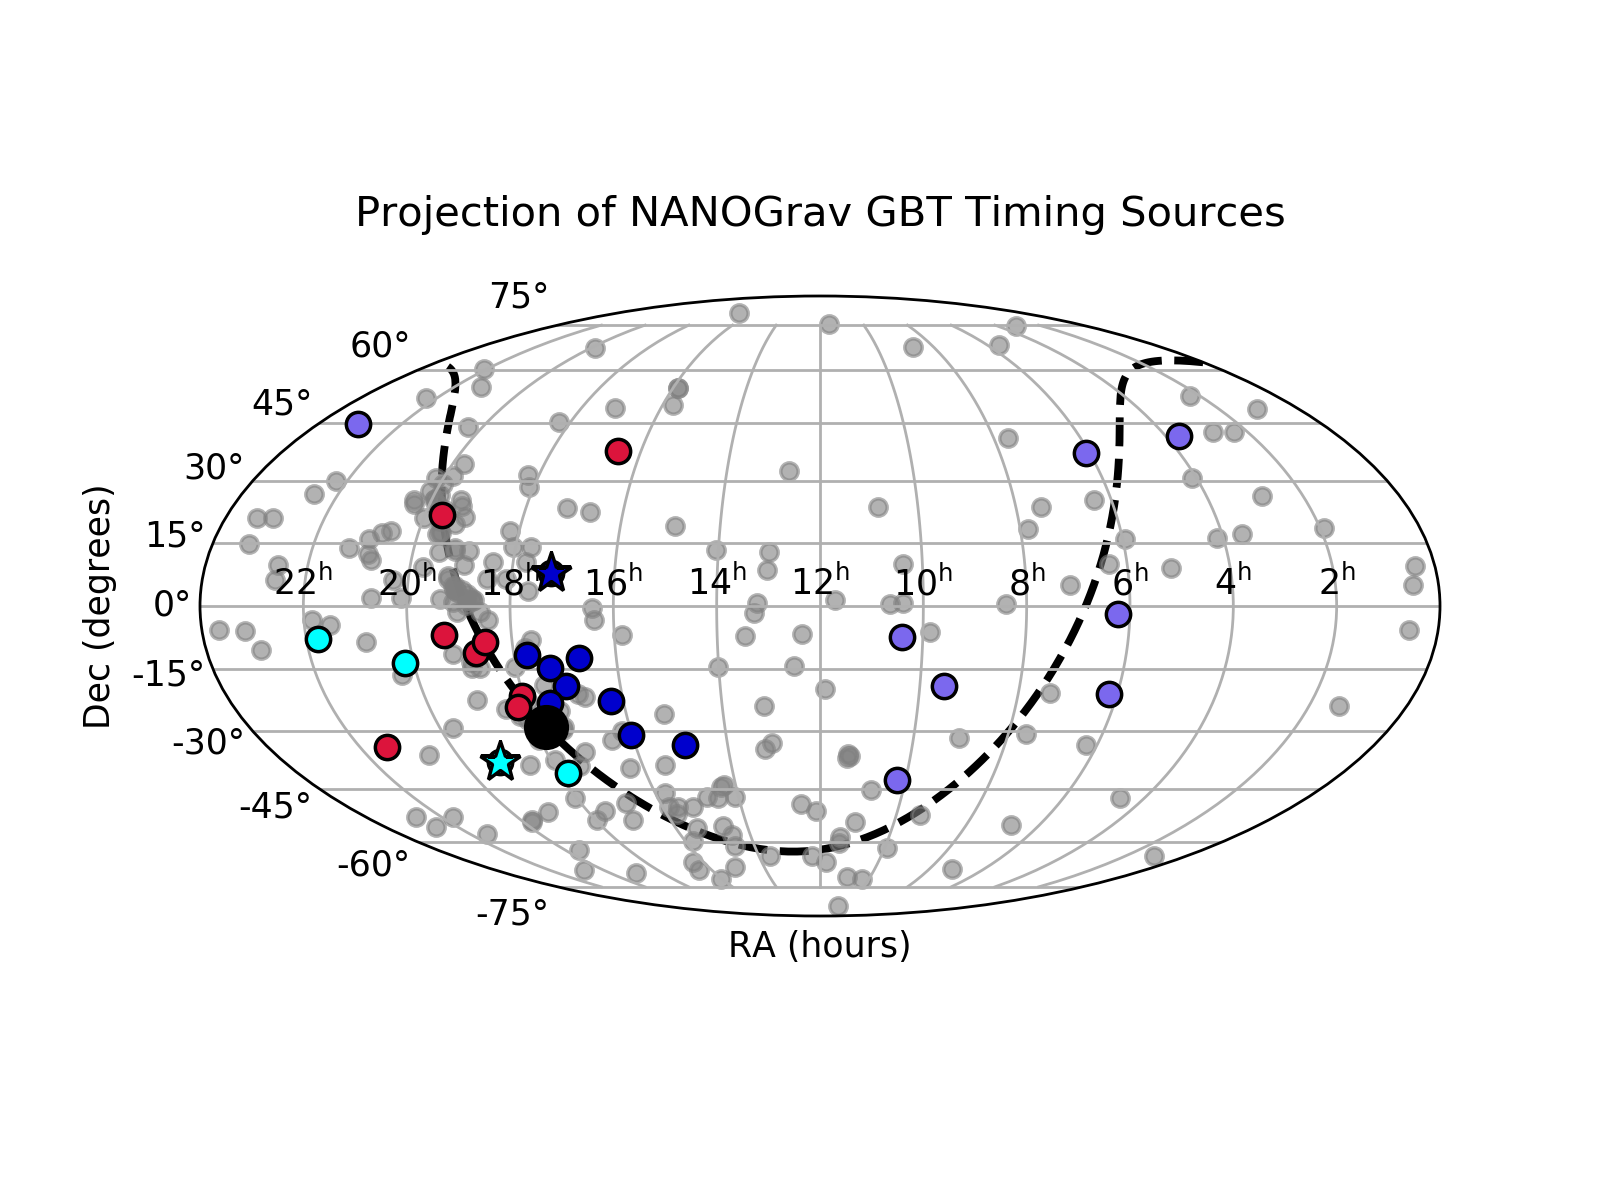

In [4]:
#%matplotlib nbagg
# create projection
ax = plt.subplot(111, projection='astro mollweide')
#ax.grid()

#add labels
#ax.set_xlabel("RA (hours)")
#ax.set_ylabel("Dec (degrees)")

#add galactic plane
lon_array = np.arange(0,360)
lat = 0.
eq_array = np.zeros((360,2))
for lon in lon_array:
    ga = ephem.Galactic(np.radians(lon), np.radians(lat))
    eq = ephem.Equatorial(ga)
    eq_array[lon] = np.degrees(eq.get())
RA = eq_array[:,0]
#print(RA)
RA = np.roll(RA,243) #use np.roll to avoid unwanted horizontal line with ax.plot
Dec = eq_array[:,1]
#print(Dec)
Dec = np.roll(Dec,243) #ditto


#ax.plot(msps.ra.radian,msps.dec.radian, '.', color="grey", markersize=10, alpha=0.6, zorder=1)

#plot_mwd(RA, Dec)
#plt.show()

def update_plot(a_sess, b_sess, c_sess, d_sess, e_sess, fa_sess, fb_sess, all_msps, gplane):
    
    ax.clear()
    
    if a_sess:
        ax.plot(a.ra.radian,a.dec.radian, '.', color="mediumblue", markersize=14, mec='k')
    if b_sess:
        ax.plot(b.ra.radian,b.dec.radian, '.', color="cyan", markersize=14, mec='k')
    if c_sess:
        ax.plot(c.ra.radian,c.dec.radian, '.', color="darkorange", markersize=14, mec='k')
    if d_sess:
        ax.plot(d.ra.radian,d.dec.radian, '.', color="mediumslateblue", markersize=14, mec='k')
    if e_sess:
        ax.plot(e.ra.radian,e.dec.radian, '.', color="crimson", markersize=14, mec='k') 
    if fa_sess:
        ax.plot(fa.ra.radian,fa.dec.radian, '*', color="mediumblue", markersize=12, mec='k')
    if fb_sess:
        ax.plot(fb.ra.radian,fb.dec.radian, '*', color="cyan", markersize=12, mec='k')
    if all_msps:
        ax.plot(msps.ra.radian,msps.dec.radian, '.', color="grey", markersize=10, alpha=0.6, zorder=1)
    if gplane:
        plot_mwd(RA, Dec)
        
    ax.plot(gc.ra.radian,gc.dec.radian, 'o', color="black", markersize=12, mec='k')
        
    ax.grid()
    ax.set_xlabel("RA (hours)")
    ax.set_ylabel("Dec (degrees)")
    plt.title('Projection of NANOGrav GBT Timing Sources', y=1.08)
    


#add legend
#leg = plt.legend(bbox_inches = 'tight')

#get figure output 
#fig = plt.gcf()
#fig.set_size_inches(10.5, 8)
#plt.savefig('/Users/Zach/Desktop/test1.pdf', bbox_inches = 'tight')
#plt.show()

#elapsed_time = time.time() - start_time
#print elapsed_time, "seconds"

In [5]:
a_sess = widgets.ToggleButton(
    value=False,
    description='A session sources',
    disabled=False,
    button_style='success',
    icon=''
)
b_sess = widgets.ToggleButton(
    value=False,
    description='B session sources',
    disabled=False,
    button_style='success',
    icon=''
)
c_sess = widgets.ToggleButton(
    value=False,
    description='C session sources',
    disabled=False,
    button_style='success',
    icon=''
)
d_sess = widgets.ToggleButton(
    value=False,
    description='D session sources',
    disabled=False,
    button_style='success',
    icon=''
)
e_sess = widgets.ToggleButton(
    value=False,
    description='E session sources',
    disabled=False,
    button_style='success',
    icon=''
)
fa_sess = widgets.ToggleButton(
    value=False,
    description='F session source 1',
    disabled=False,
    button_style='success',
    icon=''
)
fb_sess = widgets.ToggleButton(
    value=False,
    description='F session source 2',
    disabled=False,
    button_style='success',
    icon=''
)
all_msps = widgets.ToggleButton(
    value=False,
    description="All Known msp's",
    disabled=False,
    button_style='info',
    icon=''
)
gplane = widgets.ToggleButton(
    value=False,
    description='Draw Galactic Plane',
    disabled=False,
    button_style='info',
    icon=''
)
'''gc = widgets.ToggleButton(
    value=False,
    description='Show Galactic Center',
    disabled=False,
    button_style='info',
    icon=''
)'''
 
widgets.interactive(update_plot, a_sess=a_sess, b_sess=b_sess, c_sess=c_sess, d_sess=d_sess, e_sess=e_sess, fa_sess=fa_sess,
                    fb_sess=fb_sess, all_msps=all_msps, gplane=gplane)

A Jupyter Widget

CONTEXT: The North American Nanohertz Observatory for Gravitational Waves (NANOGrav)                                             
precisely observes and times an array of millisecond pulsars (msp's) in space with the Green                                     
Bank Telescope (GBT) in order to detect gravitational waves on the frequency scale of nanohertz (10^-9 Hz).                     

<table class="image">
<caption align="bottom", style="text-align: center">A typical pulsar</caption>
<tr><td><img src="https://www.ligo.org/science/Publication-O1KnownPulsar/Images/lightnew.gif"></td></tr>
</table>

<table class="image">
<caption align="bottom", style="text-align: center">Artist's rendition of a pulsar timing array (PTA)</caption>
<tr><td><img src="https://3c1703fe8d.site.internapcdn.net/newman/gfx/news/hires/2016/pulsarwebcou.jpg"></td></tr>
</table>

In [6]:
%%HTML
<iframe src="https://player.vimeo.com/video/123422738" width="640" height="471" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe>
<p><a href="https://vimeo.com/123422738#t=43s">Pulsar Timing Array</a> from <a href="https://vimeo.com/nrao">NRAO Outreach</a> on <a href="https://vimeo.com">Vimeo</a> (skip to 43 Seconds)</a>.</p>

KEY:                                                                                                                             
Big black dot = center of the Milky Way galaxy                                                                                   
A session sources = 9 msp's are observed monthly                                                                                 
B session sources = 4 msp's are observed monthly                                                                                 
C session sources = 5 msp's are observed monthly                                                                                 
D session sources = 8 msp's are observed monthly                                                                                 
E session sources = 9 msp's are observed monthly                                                                                 
F session source 1 = msp "J1713+0747" is observed weekly                                                                         
F session source 2 = msp "J1909-3744" is observed weekly                                                                         